### waveform / vectorscope example

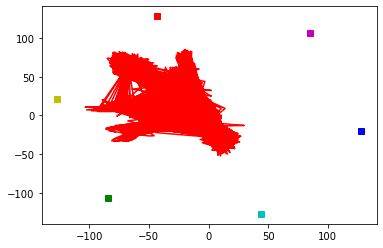

read image shape (428, 760, 3)
read image height 428
read image width 760
[  0.   1.   2. ... 757. 758. 759.]
325280
[ 17.622  18.622  20.622 ... 142.142 142.142 142.142]
325280


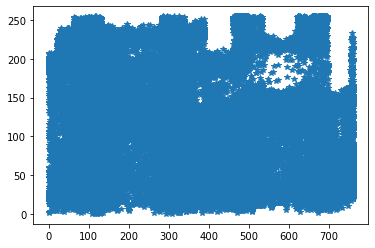

In [52]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

#input is a RGB numpy array with shape (height,width,3), can be uint,int, float or double, values expected in the range 0..255
#output is a double YUV numpy array with shape (height,width,3), values in the range 0..255
def RGB2YUV( rgb ):
    m = np.array([[0.299, -0.16874, 0.50000],
                 [0.587, -0.33126 , -0.41869],
                 [0.11400, 0.5000, -0.08131]])
    yuv = np.dot(rgb,m)
    #yuv[:,:,1:]+=128.0
    return yuv

# image1 = cv2.imread('16gray.png')
# image1 = cv2.imread('small_16_gray.png')
image1 = cv2.imread('kkobuki.jpg')
#image1 = cv2.imread('1008px-SMPTE_Color_Bars.svg.png')
# cv2.imshow("test", image1)
# cv2.waitKey(0)


## openCV read imagefile to B,G,R order
## so, re arrange to R, G, B order
b, g, r = cv2.split(image1)
image2 = cv2.merge([r,g,b])

image3_yuv = RGB2YUV( image2 )

y, uv = np.split(image3_yuv, [1], axis=2)
u, v = np.split(uv, [1], axis=2)

serial_u = np.ravel(u, order='C') # order like C language
serial_v = np.ravel(v, order='C') # order like C language
serial_y = np.ravel(y, order='C') 

# draw vectorscope
plt.plot([-43],  [128],  'rs') # s: square
plt.plot([-84],  [-106], 'gs') # s: square
plt.plot([128],  [-20],  'bs') # s: square

plt.plot([44],   [-127], 'cs') # s: square
plt.plot([85],   [107],  'ms') # s: square
plt.plot([-127], [21],   'ys') # s: square

plt.plot(serial_u, serial_v,'r')

# https://www.mikekohn.net/file_formats/yuv_rgb_converter.php
plt.show()



# draw waveform

# make width array for drawing
print("read image shape",image1.shape) # check width, height, color channel
print("read image height",image1.shape[0]) # get width only
print("read image width",image1.shape[1]) # get height only

height = image1.shape[0]
width = image1.shape[1]

array_x = np.zeros(width*height)

for i in range(height):
    for j in range(width):
        array_x[(i*width)+j] = j
        #print((i*width)+j, " ",j)

print(array_x)
print(array_x.size)
print(serial_y)
print(serial_y.size)
        
plt.plot(array_x, serial_y, '*')

### 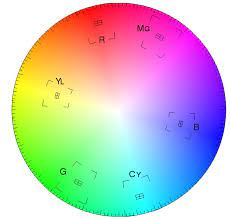
